In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#plt.style.use('classic')
plt.style.use('ggplot')

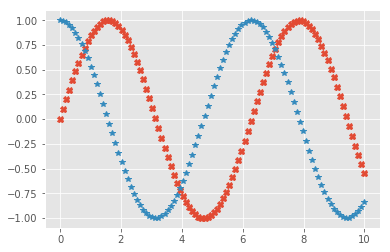

In [3]:
x = np.linspace(0,10,100)
fig = plt.figure()
plt.plot(x, np.sin(x), 'X')
plt.plot(x, np.cos(x), '*')



In [4]:
fig.savefig('my_fig1.png')

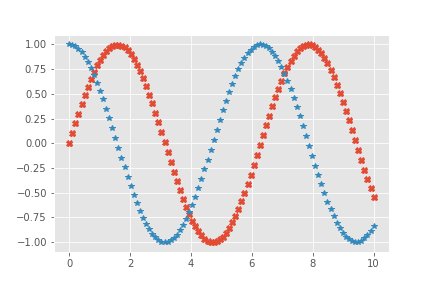

In [6]:
from IPython.display import Image
Image('my_fig1.png')

In [7]:
fig.canvas.get_supported_filetypes_grouped()

{'Encapsulated Postscript': ['eps'],
 'Joint Photographic Experts Group': ['jpeg', 'jpg'],
 'PGF code for LaTeX': ['pgf'],
 'Portable Document Format': ['pdf'],
 'Portable Network Graphics': ['png'],
 'Postscript': ['ps'],
 'Raw RGBA bitmap': ['raw', 'rgba'],
 'Scalable Vector Graphics': ['svg', 'svgz'],
 'Tagged Image File Format': ['tif', 'tiff']}

## Matlab style interface

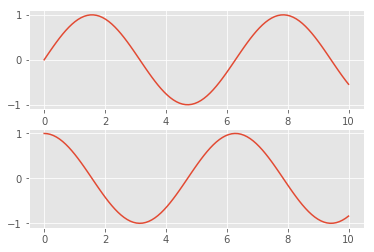

In [8]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(x, np.sin(x))

plt.subplot(2,1,2)
plt.plot(x, np.cos(x))

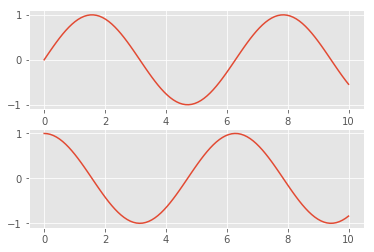

In [9]:
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

In [10]:
plt.style.use('seaborn-whitegrid')

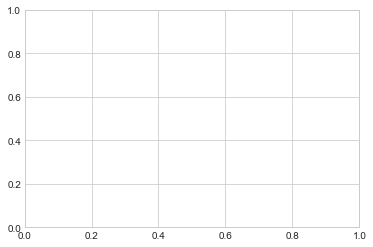

In [11]:
fig = plt.figure()
ax = plt.axes()

In [12]:
x = np.linspace(0,10,100)
ax.plot(x, np.sin(x))

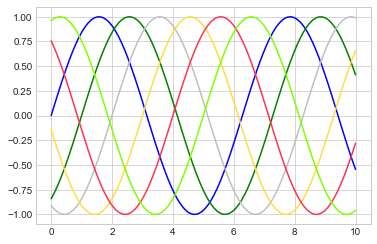

In [13]:
plt.plot(x, np.sin(x - 0), color='blue')
plt.plot(x, np.sin(x - 1), color='g')
plt.plot(x, np.sin(x - 2), color='0.75')
plt.plot(x, np.sin(x - 3), color='#FFDD44')
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3))
plt.plot(x, np.sin(x - 5), color='chartreuse')

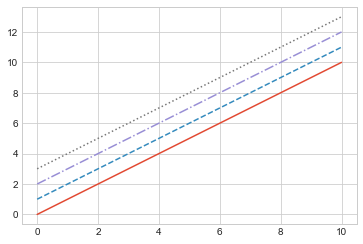

In [14]:
plt.plot(x, x+0, linestyle='solid')
plt.plot(x, x+1, linestyle='dashed')
plt.plot(x, x+2, linestyle='dashdot')
plt.plot(x, x+3, linestyle='dotted')

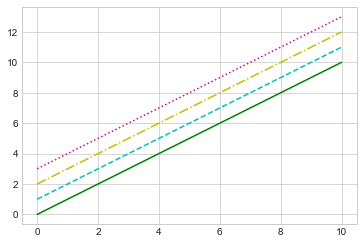

In [15]:
plt.plot(x, x+0, linestyle='-', color='g')
plt.plot(x, x+1, linestyle='--', color='c')
plt.plot(x, x+2, linestyle='-.', color='y')
plt.plot(x, x+3, linestyle=':', color='m')

(-1.5, 1.5)

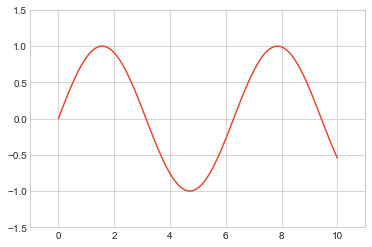

In [16]:
plt.plot(x, np.sin(x))
plt.xlim(-1,11)
plt.ylim(-1.5, 1.5)

(1.5, -1.5)

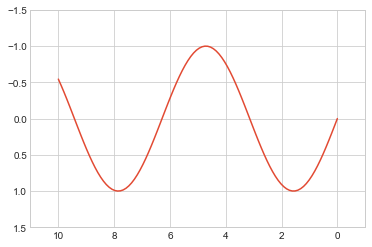

In [17]:
plt.plot(x, np.sin(x))
plt.xlim(11, -1)
plt.ylim(1.5, -1.5)

[-1, 11, -1.5, 1.5]

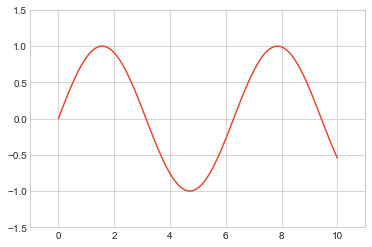

In [18]:
plt.plot(x, np.sin(x))
plt.axis([-1,11,-1.5,1.5])

(-0.5, 10.5, -1.0993384025373631, 1.0996461858110391)

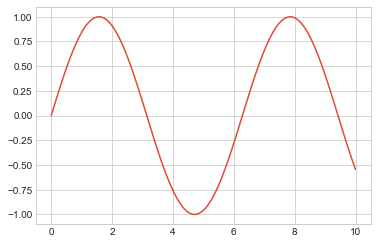

In [19]:
plt.plot(x, np.sin(x))
plt.axis('tight')

(-0.5, 10.5, -1.0993384025373631, 9.9006615974626371)

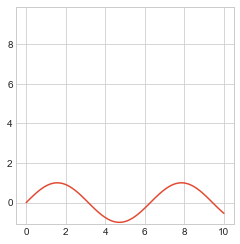

In [20]:
plt.plot(x, np.sin(x))
plt.axis('square')

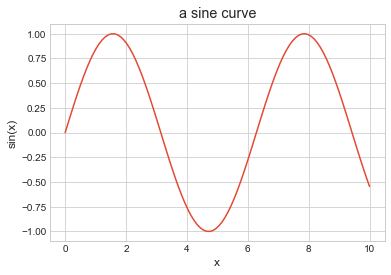

In [21]:
plt.plot(x, np.sin(x))
plt.title('a sine curve')
plt.xlabel('x')
plt.ylabel('sin(x)')

# Simple Scatter Plots

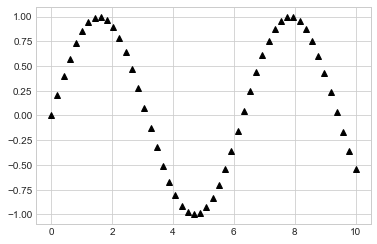

In [22]:
x = np.linspace(0,10,50)
y = np.sin(x)

plt.plot(x, y, '^', color='black')

(0, 1.8)

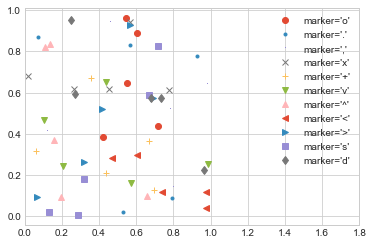

In [23]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8)


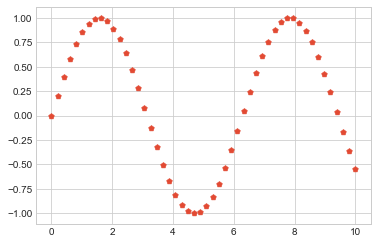

In [24]:
plt.scatter(x, y, marker='p')

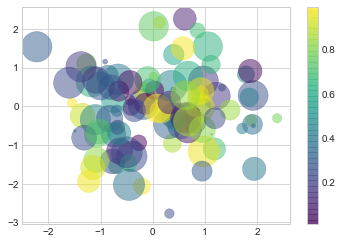

In [25]:
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='viridis')
plt.colorbar()

# Visualizing Errors

<Container object of 3 artists>

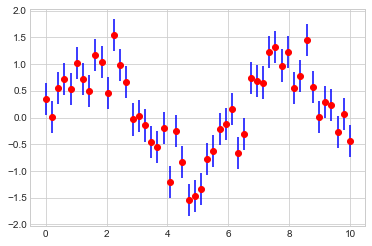

In [26]:
x = np.linspace(0, 10, 50)
dy = 0.3
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x,y, yerr=dy, color='r', ecolor='b', fmt='o')

/Users/shweta/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/shweta/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


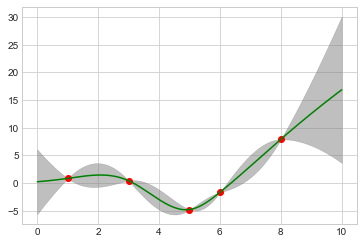

In [27]:
from sklearn.gaussian_process import GaussianProcess

model = lambda x: x * np.sin(x)
xdata = np.array([1,3,5,6,8])
ydata = model(xdata)

gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1, random_start=100)

gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0,10,1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)

plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-g')

plt.fill_between(xfit, yfit-dyfit, yfit+dyfit, color='gray', alpha=0.5)

# Density and Contour Plots

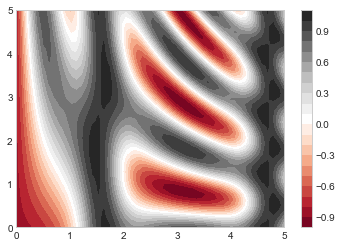

In [28]:
def f(x,y):
    return np.sin(x)**10 + np.cos(10+y*x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40) 

X, Y = np.meshgrid(x,y)
Z = f(X,Y)
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

(0.0, 5.0, 0.0, 5.0)

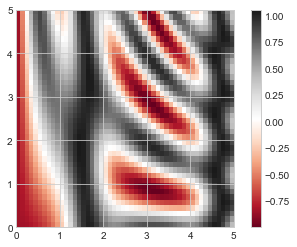

In [29]:
plt.imshow(Z, extent=[0,5,0,5], origin='lower', cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image')

# Histograms, Binnings and Density

(array([  13.,   24.,   61.,  101.,  105.,   91.,   59.,   28.,   15.,    3.]),
 array([-2.55917663, -2.00162454, -1.44407245, -0.88652035, -0.32896826,
         0.22858383,  0.78613592,  1.34368801,  1.9012401 ,  2.45879219,
         3.01634428]),
 <a list of 10 Patch objects>)

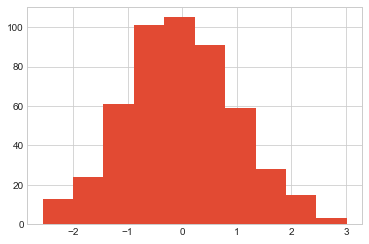

In [30]:
data = np.random.randn(500)

plt.hist(data)

(array([ 0.02152265,  0.03228398,  0.08609061,  0.05380663,  0.07532928,
         0.12913592,  0.2044652 ,  0.18294255,  0.26903316,  0.32283979,
         0.43045305,  0.33360112,  0.3658851 ,  0.39816907,  0.3658851 ,
         0.33360112,  0.32283979,  0.32283979,  0.27979449,  0.21522653,
         0.13989724,  0.09685194,  0.13989724,  0.06456796,  0.11837459,
         0.03228398,  0.01076133,  0.02152265,  0.        ,  0.01076133]),
 array([-2.55917663, -2.37332593, -2.18747523, -2.00162454, -1.81577384,
        -1.62992314, -1.44407245, -1.25822175, -1.07237105, -0.88652035,
        -0.70066966, -0.51481896, -0.32896826, -0.14311757,  0.04273313,
         0.22858383,  0.41443452,  0.60028522,  0.78613592,  0.97198661,
         1.15783731,  1.34368801,  1.5295387 ,  1.7153894 ,  1.9012401 ,
         2.08709079,  2.27294149,  2.45879219,  2.64464288,  2.83049358,
         3.01634428]),
 <a list of 1 Patch objects>)

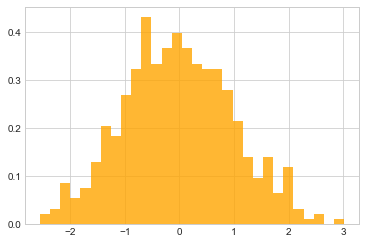

In [31]:
plt.hist(data, bins=30, normed=True, alpha=0.8, histtype='stepfilled', color = 'orange', edgecolor='none')

(array([ 0.01675406,  0.01675406,  0.02010487,  0.03350812,  0.02345568,
         0.07036704,  0.03350812,  0.05361298,  0.09382272,  0.07371785,
         0.11392759,  0.15078652,  0.18429464,  0.15413733,  0.15748814,
         0.13738327,  0.22115356,  0.2043995 ,  0.19434707,  0.18094382,
         0.22115356,  0.13068165,  0.15748814,  0.13068165,  0.14073409,
         0.06366542,  0.10387516,  0.08377029,  0.05361298,  0.0301573 ,
         0.03350812,  0.01340325,  0.02345568,  0.00335081,  0.01340325,
         0.00670162,  0.        ,  0.00335081,  0.        ,  0.00335081]),
 array([-2.25670884, -1.95827368, -1.65983851, -1.36140335, -1.06296818,
        -0.76453302, -0.46609785, -0.16766268,  0.13077248,  0.42920765,
         0.72764281,  1.02607798,  1.32451314,  1.62294831,  1.92138348,
         2.21981864,  2.51825381,  2.81668897,  3.11512414,  3.4135593 ,
         3.71199447,  4.01042964,  4.3088648 ,  4.60729997,  4.90573513,
         5.2041703 ,  5.50260546,  5.80104063,  6

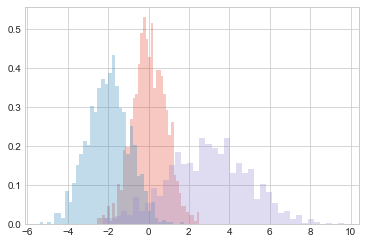

In [32]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

# 2D Histograms

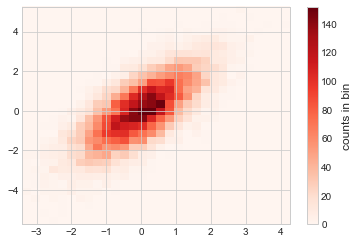

In [33]:
mean = [0, 0]
cov = [[1,1], [1,2]]

x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=30, cmap='Reds')
cb = plt.colorbar()
cb.set_label('counts in bin')

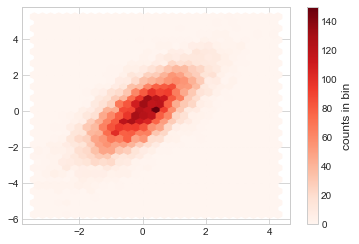

In [34]:
plt.hexbin(x, y, gridsize=30, cmap='Reds')
cb = plt.colorbar()
cb.set_label('counts in bin')

# Plot Legend

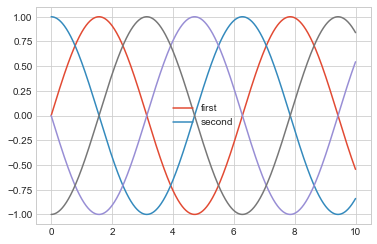

In [35]:
x = np.linspace(0, 10, 1000)
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x,y)
plt.legend(lines[:2], ['first', 'second'])

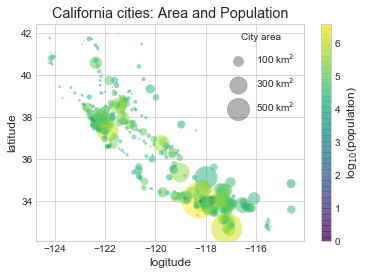

In [36]:
import pandas as pd
cities = pd.read_csv('../data/california_cities.csv')

lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

plt.scatter(lon, lat, label=None,  c = np.log10(population),
           cmap='viridis', s = area, linewidth = 0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('logitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_1$$_0$(population)')

for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area)+' km$^2$')
    
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City area')
plt.title('California cities: Area and Population')

# Customizing Colorbars

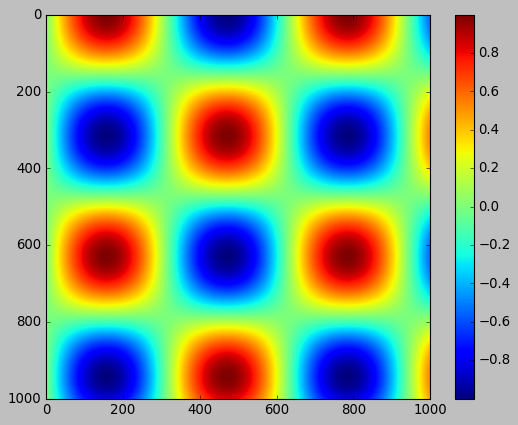

In [37]:
plt.style.use('classic')
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()

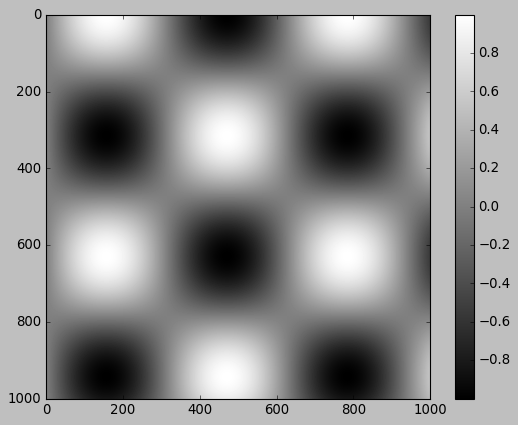

In [38]:
plt.imshow(I, cmap='gray')
plt.colorbar()

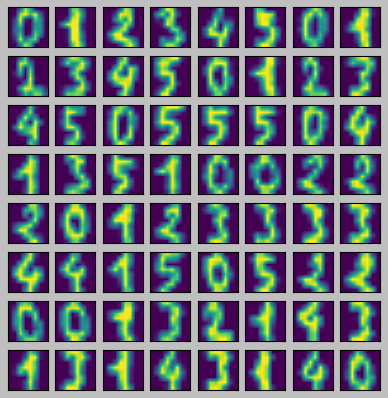

In [39]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6,6))

for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='viridis')
    axi.set(xticks=[], yticks=[])

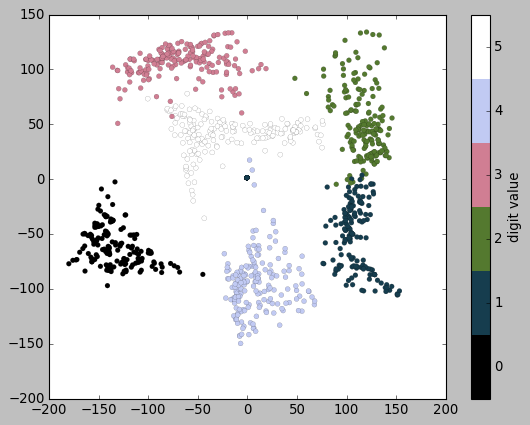

In [40]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

# Multiple Subplots

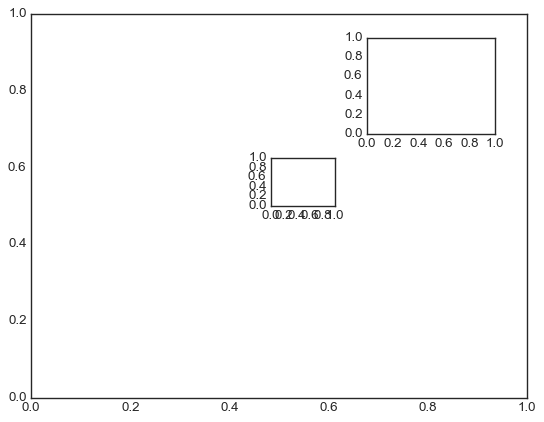

In [41]:
plt.style.use('seaborn-white')

ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])
ax3 = plt.axes([0.50, 0.50, 0.1, 0.1])

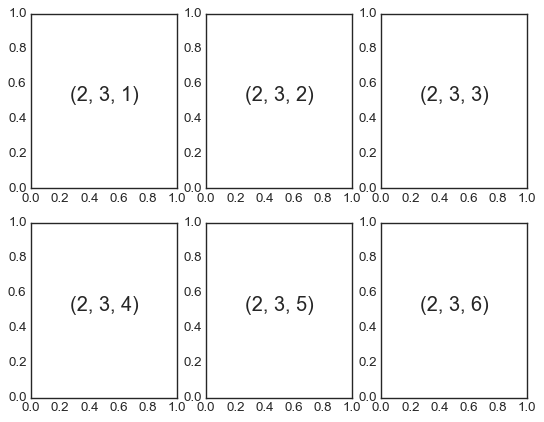

In [42]:
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5, str((2,3,i)), 
            fontsize=18, ha='center')

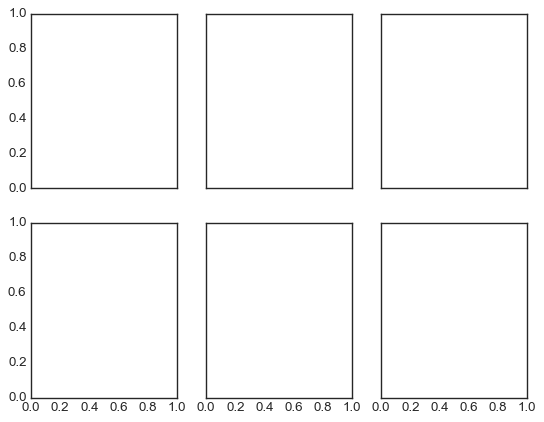

In [43]:
fig, sx = plt.subplots(2, 3, sharex='col', sharey='row')

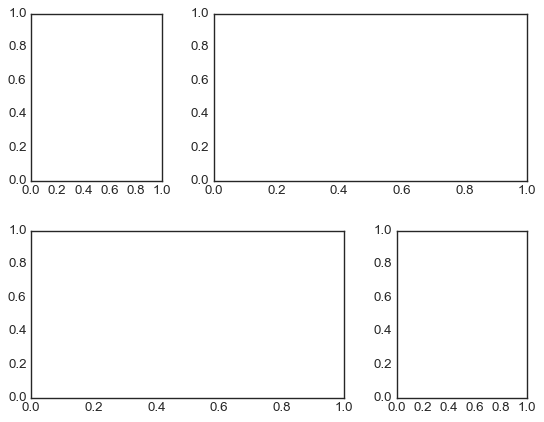

In [44]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2])

# Text and Annotation

In [45]:
plt.style.use('seaborn-whitegrid')

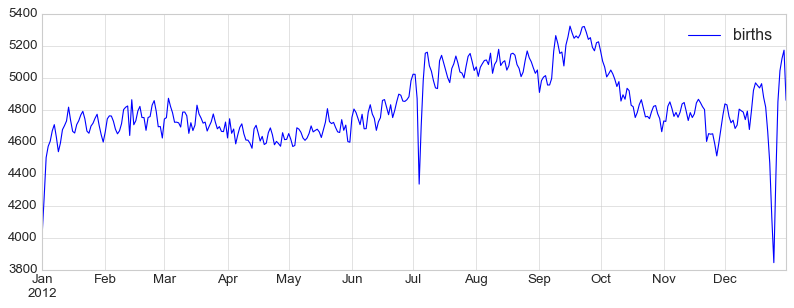

In [46]:
births = pd.read_csv('../data/births.csv')

quartiles = np.percentile(births['births'], [25,50,75])
mu, sig = quartiles[1], 0.74*(quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 *@sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 
                             100 * births.month + 
                             births.day, format='%Y%m%d')

births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

births_by_date.index = [pd.datetime(2012, month, day) for (month,day) in births_by_date.index]

fig, ax = plt.subplots(figsize = (12,4))
births_by_date.plot(ax=ax)

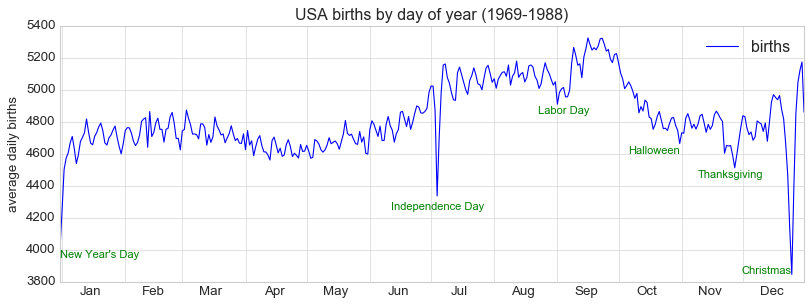

In [47]:
fig, ax = plt.subplots(figsize = (12,4))
births_by_date.plot(ax=ax)
style = dict(size=10, color='green')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day",ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right',**style)
ax.text('2012-11-25', 4450, "Thanksgiving",ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas",ha='right', **style)

ax.set(title='USA births by day of year (1969-1988)', 
      ylabel = 'average daily births')
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))


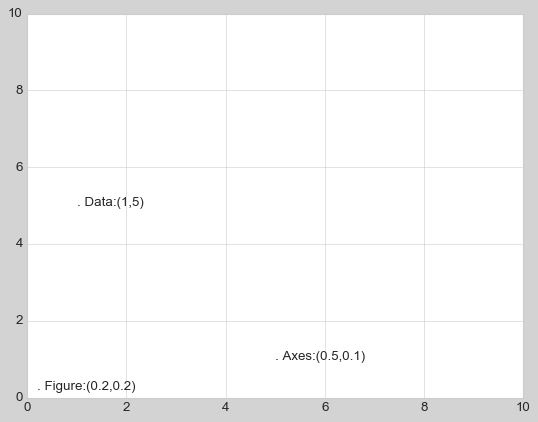

In [48]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0,10,0,10])

ax.text(1,5, ". Data:(1,5)")
ax.text(0.5,0.1, ". Axes:(0.5,0.1)", transform=ax.transAxes)
ax.text(0.2,0.2, ". Figure:(0.2,0.2)")

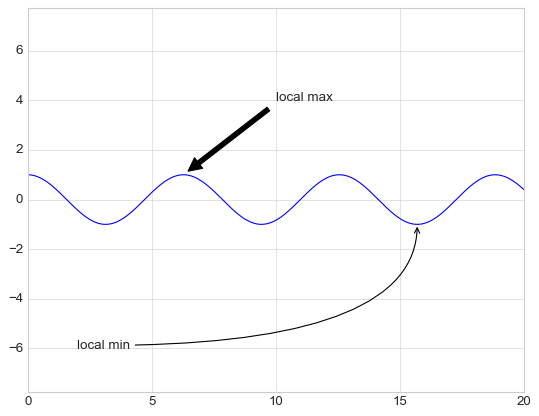

In [49]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local max', xy=(6.28,1), xytext=(10,4), arrowprops=dict(facecolor='black', shrink=.05))
ax.annotate('local min', xy=(5*np.pi,-1), xytext=(2,-6), 
                            arrowprops=dict(arrowstyle='->', connectionstyle="angle3,angleA=0,angleB=-90"))

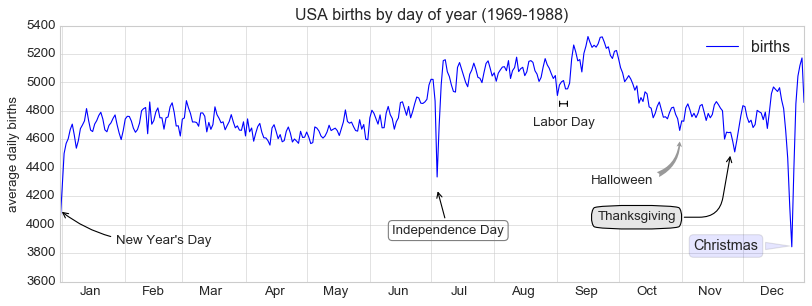

In [50]:
fig, ax = plt.subplots(figsize = (12,4))
births_by_date.plot(ax=ax)

ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data', 
           xytext=(50,-30), textcoords='offset points', 
           arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate("Labor Day", xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')

ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
            fc="0.6", ec="none",
            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
            connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
            xytext=(-30, 0), textcoords='offset points',
            size=13, ha='right', va="center",
            bbox=dict(boxstyle="round", alpha=0.1),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
                    ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

# Customizing ticks

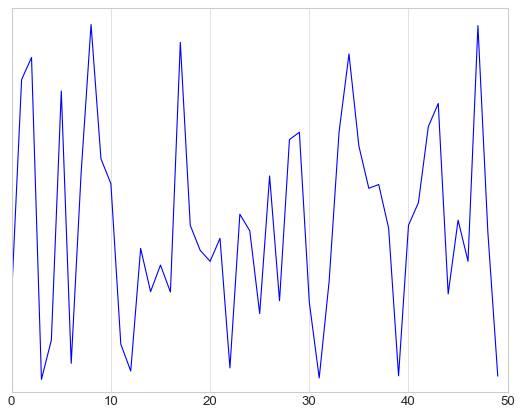

In [51]:
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_formatter(plt.NullFormatter())

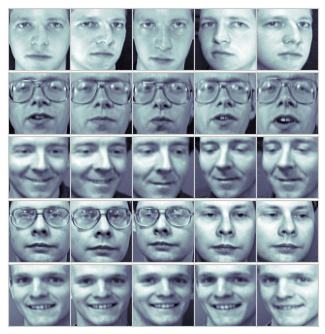

In [52]:
fig, ax = plt.subplots(5,5,figsize=(5,5))
fig.subplots_adjust(hspace=0, wspace=0)

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i,j].xaxis.set_major_locator(plt.NullLocator())
        ax[i,j].yaxis.set_major_locator(plt.NullLocator())
        ax[i,j].imshow(faces[10*i+j], cmap='bone')

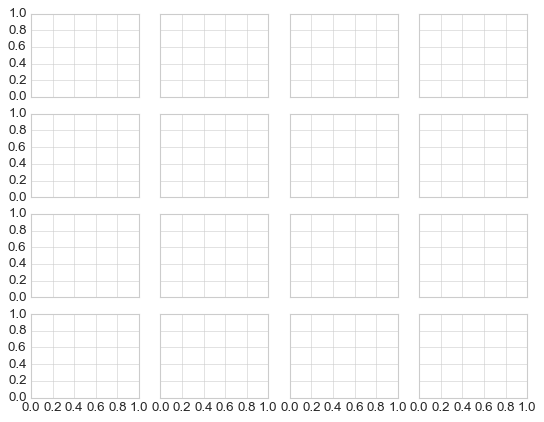

In [53]:
fig, ax = plt.subplots(4,4,sharex=True, sharey=True)

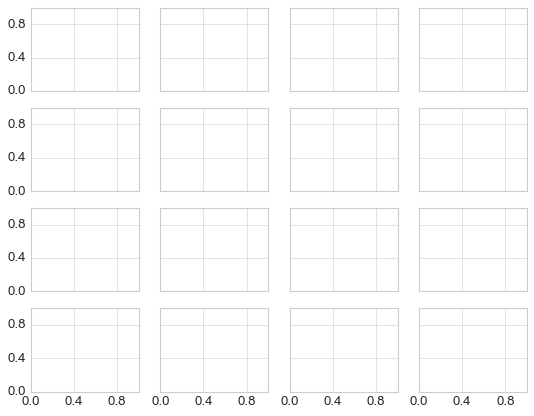

In [54]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
    
fig

# Customizing Matplotlib: Configurations and Stylesheets

(array([   5.,   21.,   86.,  195.,  243.,  229.,  152.,   44.,   21.,    4.]),
 array([-3.32112787, -2.63844897, -1.95577007, -1.27309117, -0.59041227,
         0.09226663,  0.77494553,  1.45762443,  2.14030333,  2.82298223,
         3.50566113]),
 <a list of 10 Patch objects>)

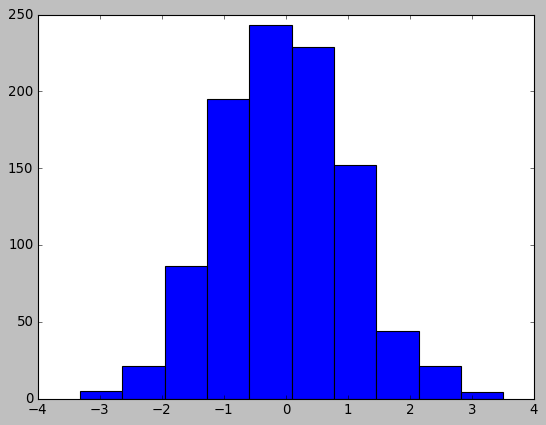

In [55]:
plt.style.use('classic')

x = np.random.randn(1000)
plt.hist(x)

(array([   5.,   21.,   86.,  195.,  243.,  229.,  152.,   44.,   21.,    4.]),
 array([-3.32112787, -2.63844897, -1.95577007, -1.27309117, -0.59041227,
         0.09226663,  0.77494553,  1.45762443,  2.14030333,  2.82298223,
         3.50566113]),
 <a list of 10 Patch objects>)

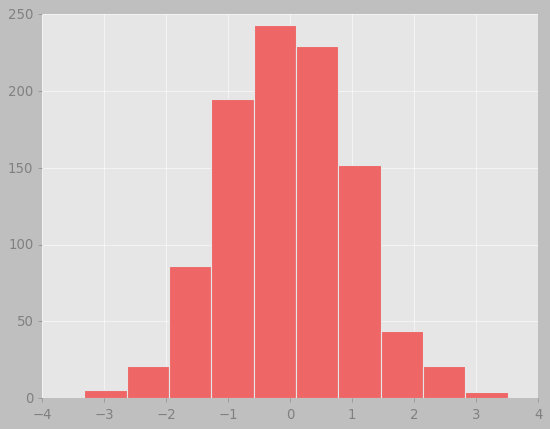

In [56]:
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

plt.grid(color='w', linestyle='solid')

for spine in ax.spines.values():
    spine.set_visible(False)
    
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666')

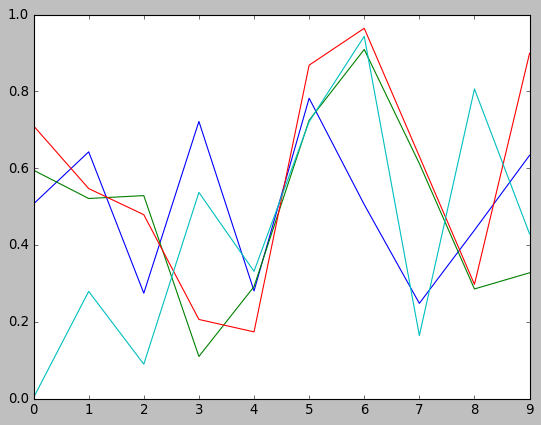

In [57]:
for i in range(4):
    plt.plot(np.random.rand(10))

In [58]:
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

In [59]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1,2, figsize=(11,4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')    

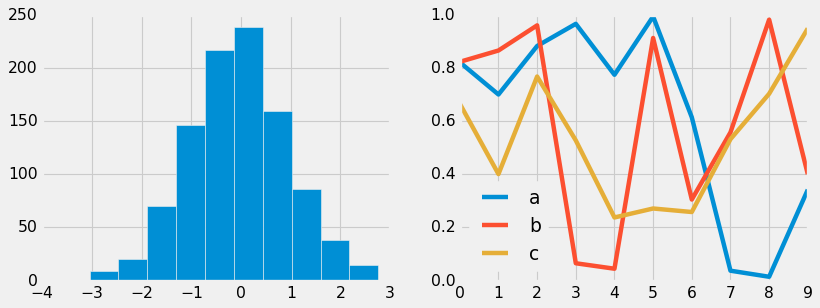

In [60]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

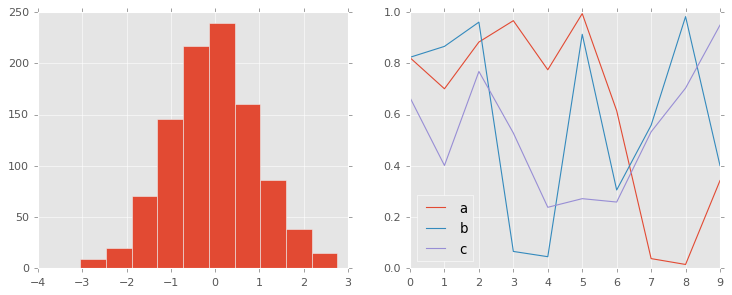

In [61]:
with plt.style.context('ggplot'):
    hist_and_lines()

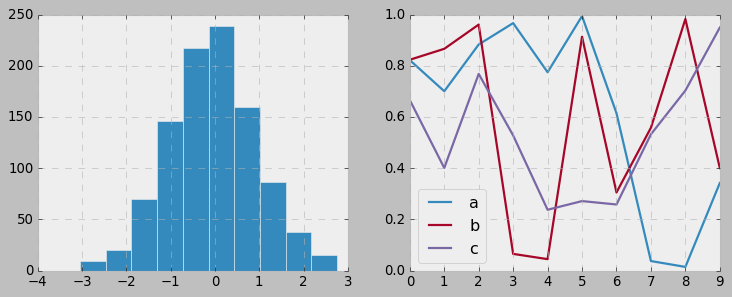

In [62]:
with plt.style.context('bmh'):
    hist_and_lines()

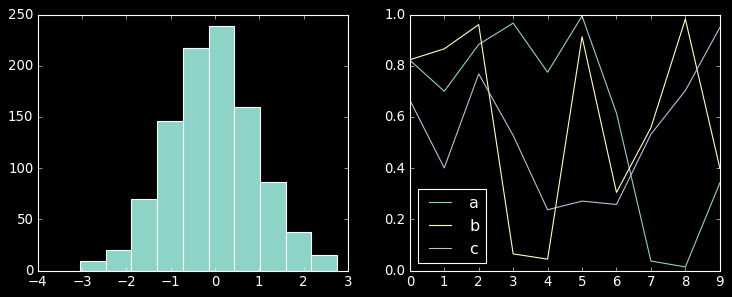

In [63]:
with plt.style.context('dark_background'):
    hist_and_lines()

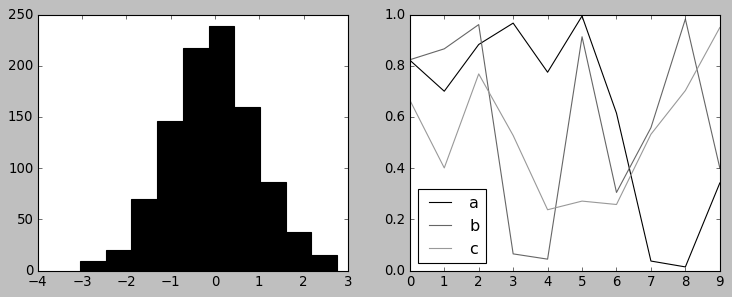

In [64]:
with plt.style.context('grayscale'):
    hist_and_lines()

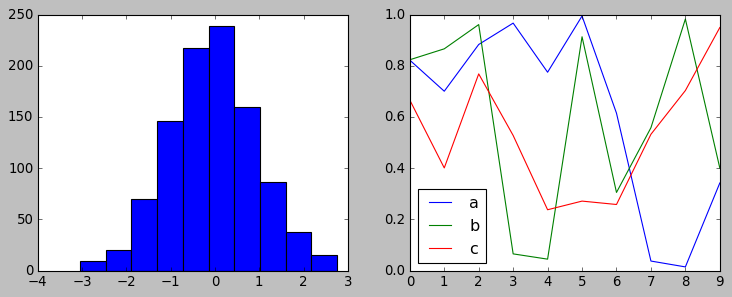

In [65]:
import seaborn
hist_and_lines()

# 3D Plotting

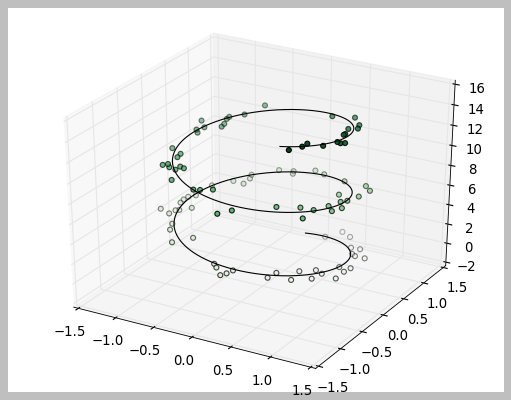

In [66]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

zline = np.linspace(0,15,1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'black')

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata,ydata,zdata,c=zdata,cmap='Greens')

In [67]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


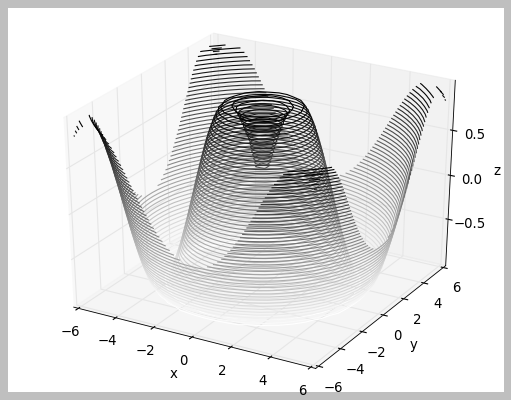

In [68]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

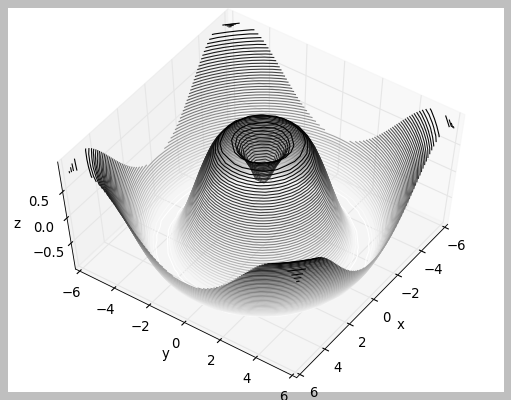

In [69]:
ax.view_init(60,35)
fig

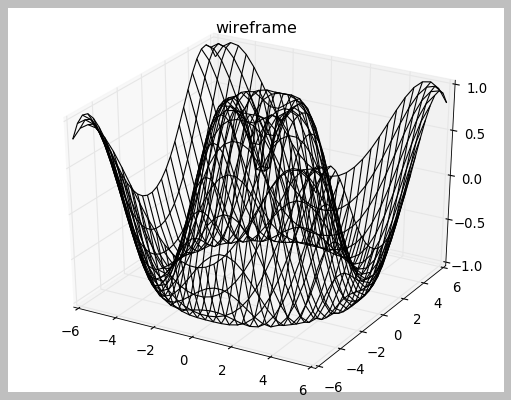

In [70]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z,color='black')
ax.set_title('wireframe')

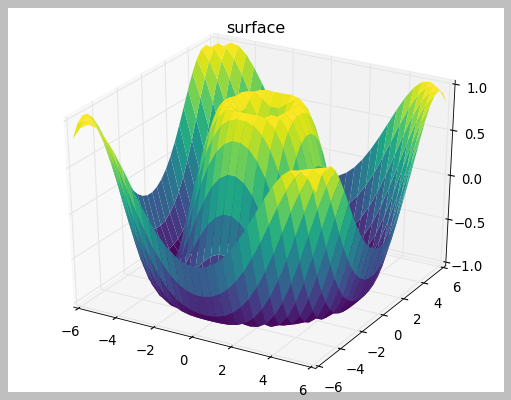

In [71]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface')

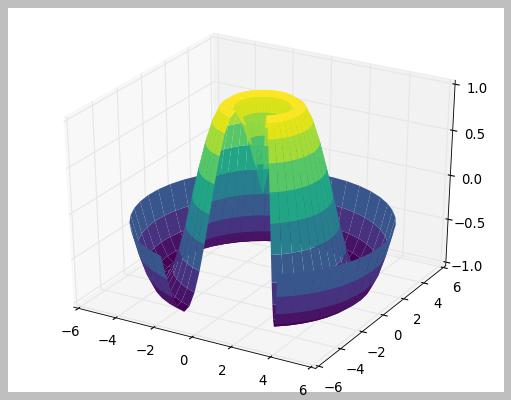

In [72]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)
X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
cmap='viridis', edgecolor='none');

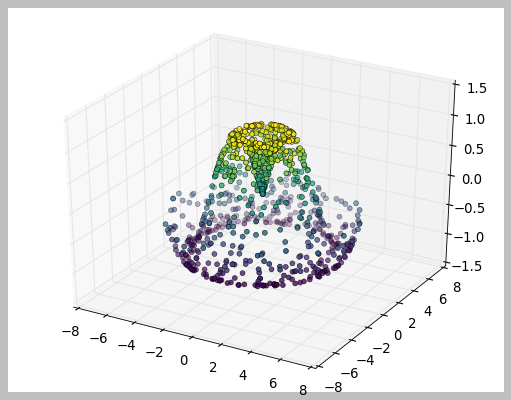

In [73]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)

x = np.ravel( r * np.sin(theta))
y = np.ravel( r * np.cos(theta))
z = f(x,y)

ax = plt.axes(projection='3d')
ax.scatter(x,y,z,c=z, cmap='viridis', linewidth=0.5)

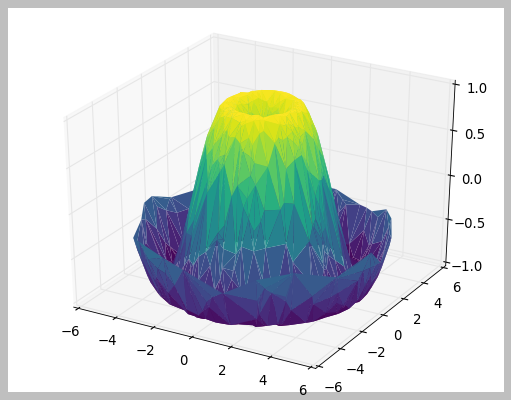

In [74]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x,y,z,cmap='viridis', edgecolor='none')

In [75]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

In [76]:
phi = 0.5 * theta

In [77]:
# radius in x-y plane
r = 1 + w * np.cos(phi)
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

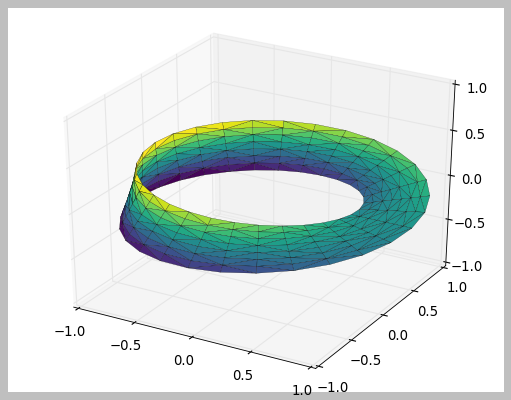

In [78]:
# triangulate in the underlying parameterization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
cmap='viridis', linewidths=0.2);
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

# Geographic Data with Basemap

In [79]:
from mpl_toolkits.basemap import Basemap

/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


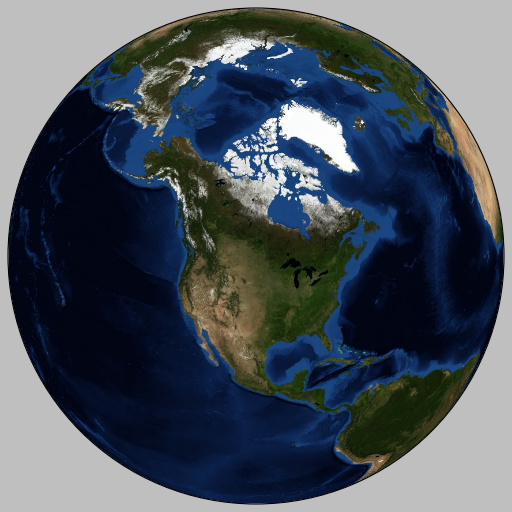

In [80]:
plt.figure(figsize=(8,8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)

/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


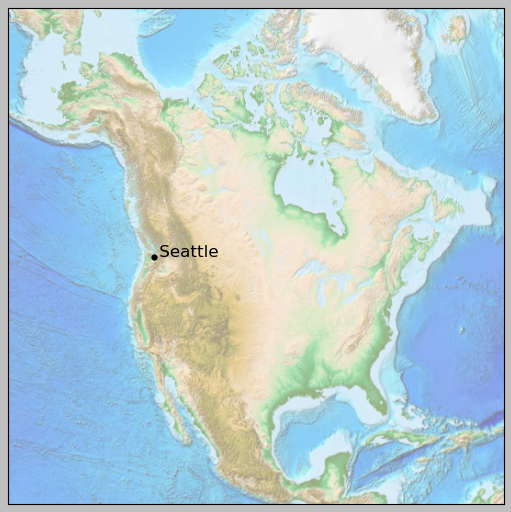

In [81]:
plt.figure(figsize=(8,8))
m = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6, lat_0=50, lon_0=-100)
m.etopo(scale=0.5, alpha=0.5)

x, y = m(-122.3, 47.6)
plt.plot(x,y, 'ok', markersize=5)
plt.text(x,y, ' Seattle', fontsize=15)

In [82]:
from itertools import chain

def draw_map(m, scale=0.2):
    m.shadedrelief(scale=scale)
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))
    
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


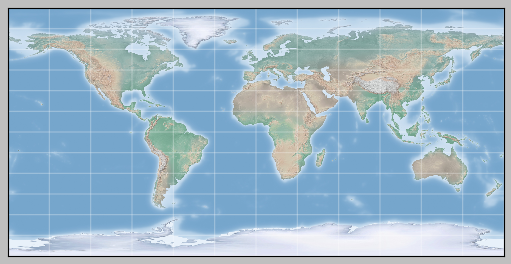

In [83]:
fig = plt.figure(figsize=(8,8), edgecolor='w')
m = Basemap(projection='cyl', resolution=None, llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)
draw_map(m)

/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


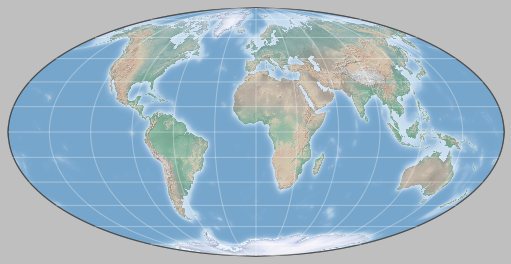

In [84]:
fig = plt.figure(figsize=(8,6), edgecolor='w')
m = Basemap(projection='moll', resolution=None, lat_0=0, lon_0=0)
draw_map(m)

/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


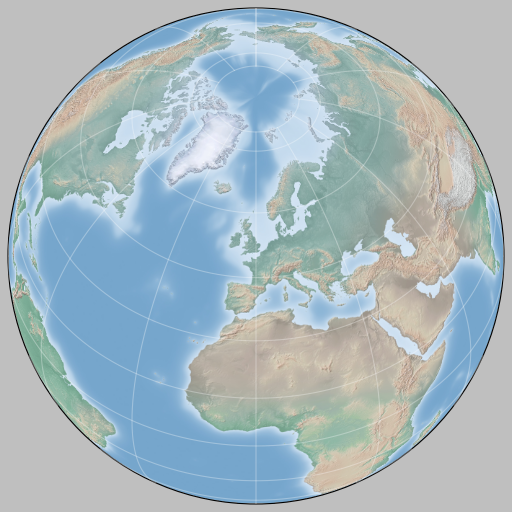

In [85]:
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=0)
draw_map(m)

/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


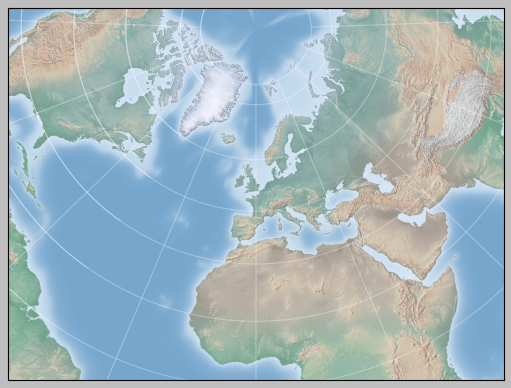

In [86]:
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc', resolution=None, lat_0=50, lon_0=0, lat_1=45, lat_2=55, width=1.6E7, height=1.2E7)
draw_map(m)

In [117]:
cities = pd.read_csv('../data/california_cities.csv')
cities.head()

city       latd       longd  elevation_m  elevation_ft  \
0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2      Alameda  37.756111 -122.274444          NaN          33.0   
3       Albany  37.886944 -122.297778          NaN          43.0   
4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  area_water_km2  area_water_percent  
0         145.107        145.062           0.046                0.03  
1          20.260         20.184           0.076                0.37  
2          59.465         27.482          31.983               53.79  
3          14.155          4.632           9.524               67.28  
4          19.766         19.763           0.003                0.01

In [118]:
# Extract the data we're interested in
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


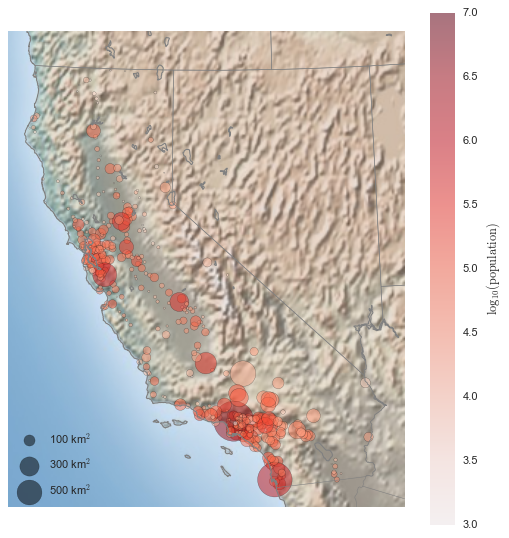

In [119]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h',
                    lat_0=37.5, lon_0=-119,
                    width=1E6, height=1.2E6)

m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
c=np.log10(population), s=area,
cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a) + ' km$^2$')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left');

In [120]:
from netCDF4 import Dataset
from netCDF4 import date2index
from datetime import datetime

data = Dataset('../data/gistemp250.nc')

In [121]:
timeindex = date2index(datetime(2014, 1, 15), data.variables['time'])

In [122]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]

lon,lat = np.meshgrid(lon, lat)
temp_anamoly = data.variables['tempanomaly'][timeindex]

/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/shweta/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


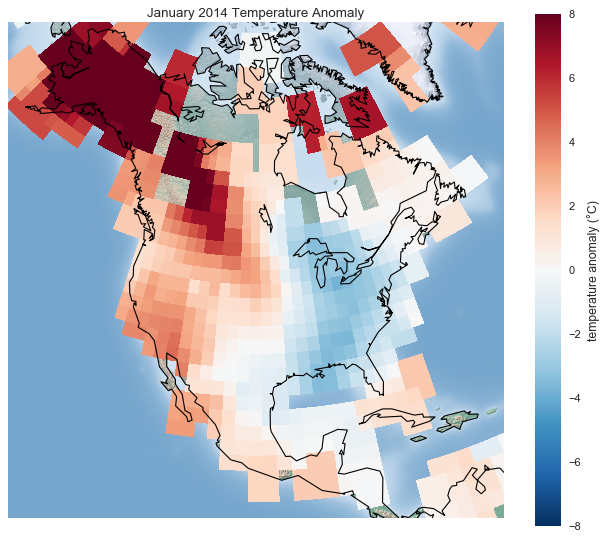

In [123]:
fig = plt.figure(figsize=(10,8))
m = Basemap(projection='lcc', resolution='c', width=8E6, height=8E6, 
           lat_0=45, lon_0=-100)

m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anamoly, latlon=True, cmap='RdBu_r')
plt.clim(-8,8)
m.drawcoastlines(color='black')

plt.title('January 2014 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (°C)');

# SEABORN

In [124]:
plt.style.use('classic')

In [125]:
rng = np.random.RandomState(0)
x = np.linspace(0,10,500)
y = np.cumsum(rng.randn(500, 6), 0)

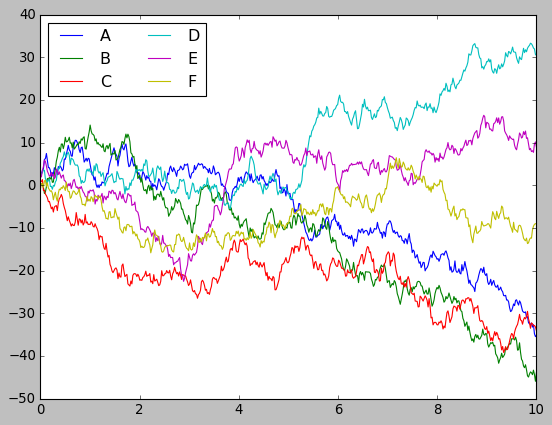

In [126]:
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [97]:
import seaborn as sns
sns.set()

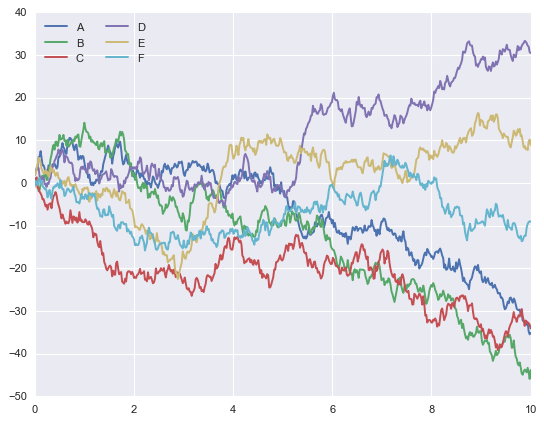

In [98]:
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

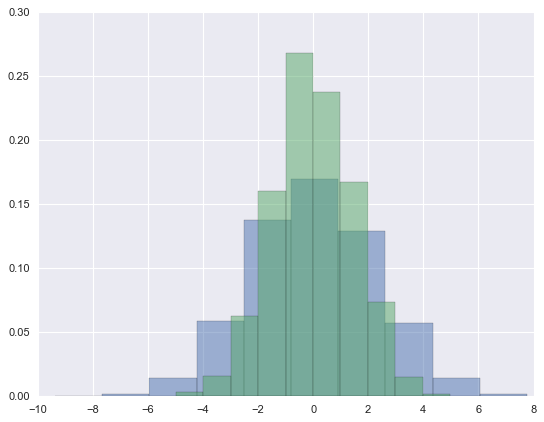

In [99]:
data = np.random.multivariate_normal([0,0], [[5,2], [2,2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

(0.0, 0.3)

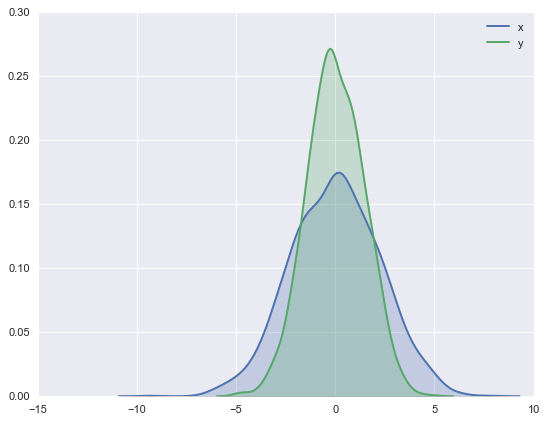

In [100]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)
    
plt.ylim(0.0, 0.30)

(0.0, 0.3)

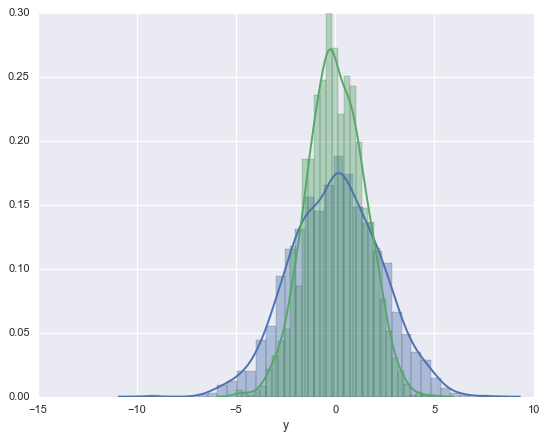

In [101]:
sns.distplot(data['x'])
sns.distplot(data['y'])
plt.ylim(0.0, 0.30)

/Users/shweta/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


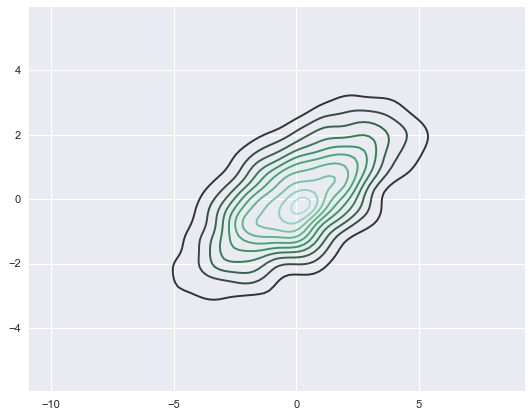

In [102]:
sns.kdeplot(data)

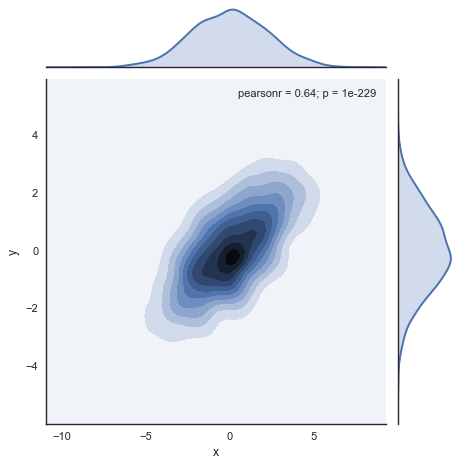

In [103]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde')

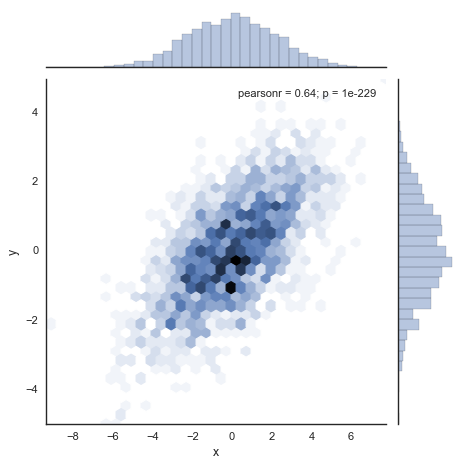

In [104]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

In [105]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

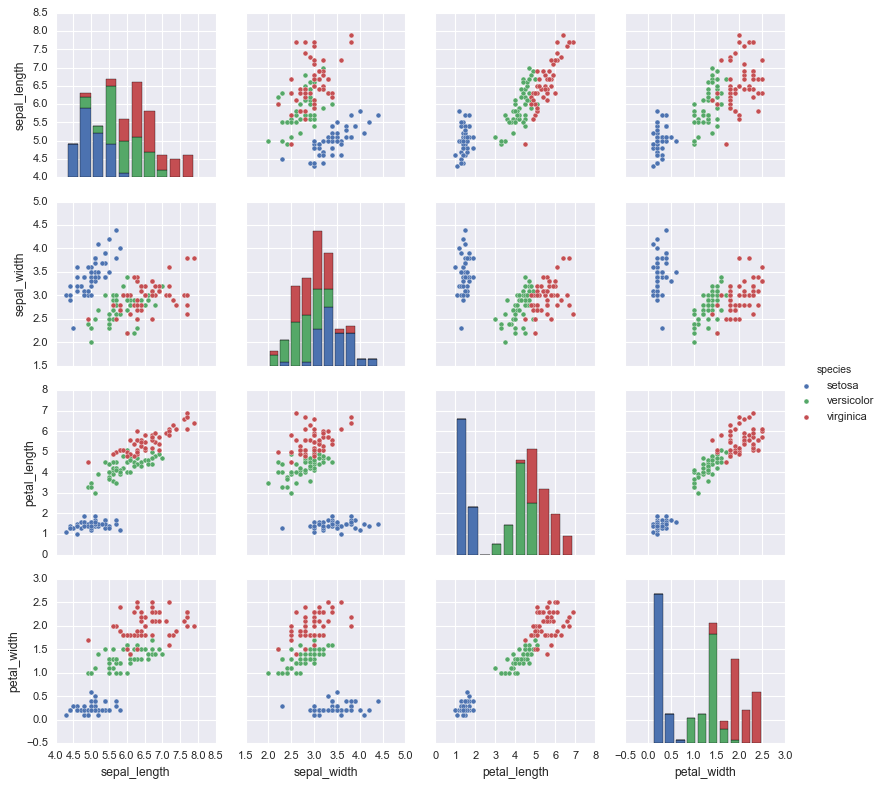

In [106]:
sns.pairplot(iris, hue='species', size = 2.5)

In [107]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

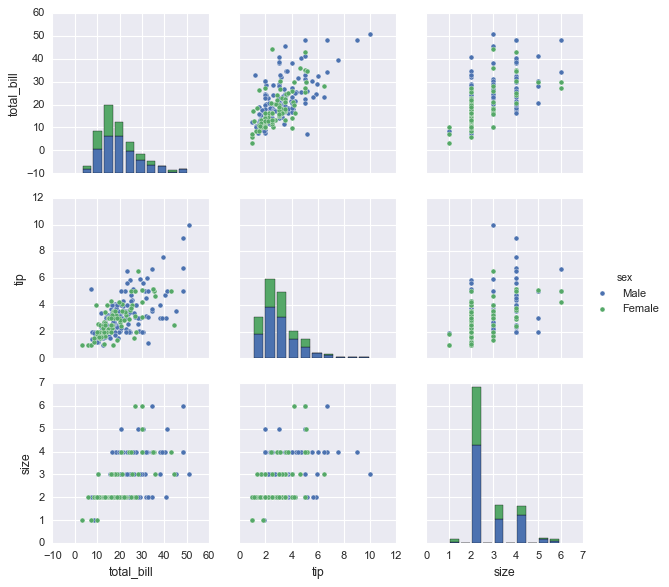

In [108]:
sns.pairplot(tips, hue='sex', size = 2.5)

In [109]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips.head()

total_bill   tip     sex smoker  day    time  size    tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765

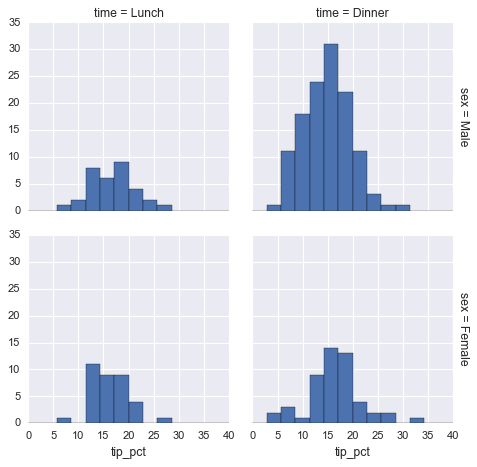

In [110]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins = np.linspace(0, 40, 15))

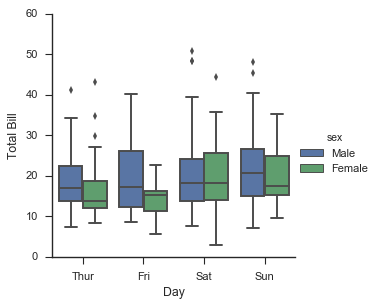

In [111]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

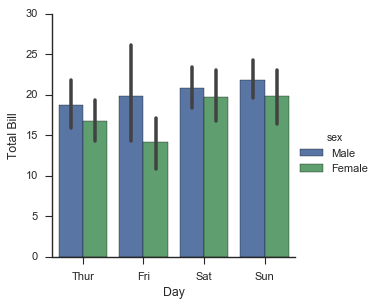

In [112]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="bar")
    g.set_axis_labels("Day", "Total Bill")

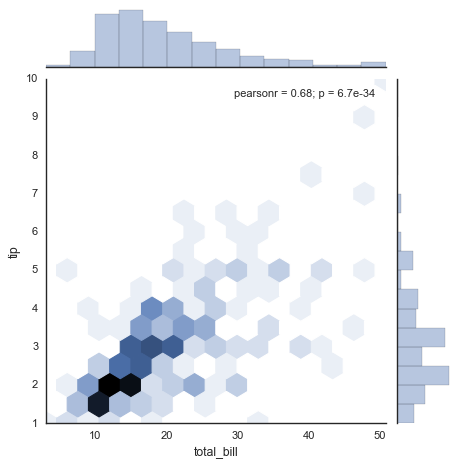

In [113]:
with sns.axes_style(style='white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

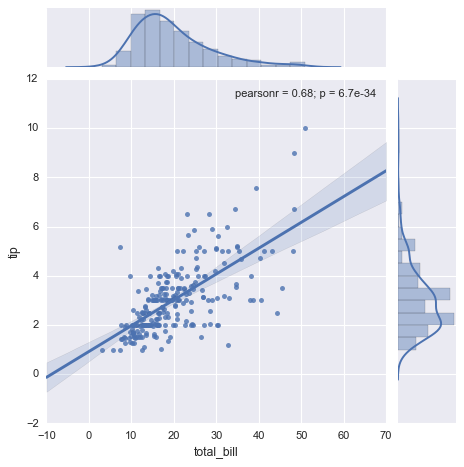

In [114]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg')

In [115]:
planets = sns.load_dataset('planets')
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

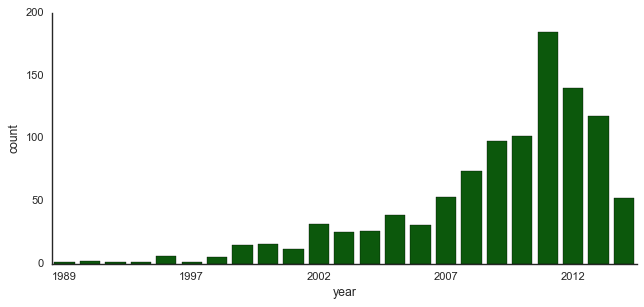

In [116]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2, kind="count", color='darkgreen')
    g.set_xticklabels(step=5)